In [19]:
import os
from pathlib import Path

import math
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torch.utils.data import Dataset

from time import time 

## Setting data directory

In [20]:
data_dir = Path('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original')
data_files = list(data_dir.iterdir())
print(data_files)

[PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2017_2017.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/isaac_test.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2014_2014.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2007_2007.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2007_2007.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2003_2003.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2008_2008.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2006_2006.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2013_2013.csv'), PosixPath('/home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2014_2014.csv'), PosixPath('/home/caps

## Defining data loading functions

In [21]:
def get_data(year, data_files):
    """Return the feature file and target file of the given year.

    Args:
        year (int): The year of the data to retrieve.
        data_files (list[Path]): The list of data paths.

    Returns:
        tuple[Path, Path]: The feature file path and the target file path.
    """
    feature_file = None
    target_file = None
    for f in data_files:
        f_str = f.as_posix()
        if(('CD' in f_str) and (str(year) in f_str)):
            feature_file = f
        if(('TD' in f_str) and (str(year) in f_str)):
            target_file = f

    return feature_file, target_file        

def load_data(years, data_files):
    """Return a dataframe containing all the data of the given years.

    Args:
        years (list[int]): A list of years to retrieve the data from.
        data_files (list[Path]): A list of paths for data and target files.

    Returns:
        pd.DataFrame: A dataframe containing all feature and target values.
    """
    dfs = []
    for year in years:
        feature_file, target_file = get_data(year=year, data_files=data_files)
        print(year, feature_file, target_file)
        X = pd.read_csv(feature_file)
        y = pd.read_csv(target_file)
        dfs.append(X.merge(y, how='inner'))
    
    return pd.concat(dfs)

In [22]:
df = load_data(years=[2003], data_files=data_files)

2003 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2003_2003.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2003_2003.csv


In [23]:
df

,pixel_id,pixel_id.1,Road_Dist,Elec_Dist,Cultivated_Prop,Elev,time_Normal,aet__count_above_mean_Normal,aet__count_below_mean_Normal,aet__first_location_of_maximum_Normal,...,pck__skewness_Normal,pck__standard_deviation_Normal,time,aet__mean_ThreeYear_Dev,cwd__mean_ThreeYear_Dev,Mean_Housing_Dens_25km,FFWI,FFWI_UCLA,time_since_fire,value
0,0,0,-3.402824e+38,152.970580,0.0,-9999.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,15.373391,0.0,0.0,74.0,0.0
1,1,1,-3.402824e+38,152.777620,0.0,-9999.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,13.488479,0.0,0.0,74.0,0.0
2,2,2,-3.402824e+38,152.590960,0.0,-9999.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,12.024852,0.0,0.0,74.0,0.0
3,3,3,-3.402824e+38,152.410630,0.0,-9999.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,11.093394,0.0,0.0,74.0,0.0
4,4,4,-3.402824e+38,152.236660,0.0,-9999.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,10.546673,0.0,0.0,74.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137664,1137664,1137664,-3.402824e+38,57.280014,0.0,369.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,0.000000,0.0,27.0,74.0,0.0
1137665,1137665,1137665,-3.402824e+38,57.982758,0.0,344.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,0.000000,0.0,27.0,74.0,0.0
1137666,1137666,1137666,-3.402824e+38,58.694122,0.0,337.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,0.000000,0.0,0.0,74.0,0.0
1137667,1137667,1137667,-3.402824e+38,59.413803,0.0,328.0,195101_198012,-9999.0,-9999.0,-9999.0,...,-9999.0,-9999.0,200001_200212,0.0,0.0,0.000000,0.0,0.0,74.0,0.0


## Defining the feature mappings

In [24]:
features = df.columns
features

Index(['pixel_id', 'pixel_id.1', 'Road_Dist', 'Elec_Dist', 'Cultivated_Prop',
       'Elev', 'time_Normal', 'aet__count_above_mean_Normal',
       'aet__count_below_mean_Normal', 'aet__first_location_of_maximum_Normal',
       'aet__last_location_of_maximum_Normal',
       'aet__longest_strike_above_mean_Normal',
       'aet__longest_strike_below_mean_Normal', 'aet__maximum_Normal',
       'aet__mean_Normal', 'aet__minimum_Normal',
       'aet__quantile__q_0.1_Normal', 'aet__quantile__q_0.5_Normal',
       'aet__quantile__q_0.9_Normal', 'aet__skewness_Normal',
       'aet__standard_deviation_Normal', 'cwd__count_above_mean_Normal',
       'cwd__count_below_mean_Normal', 'cwd__first_location_of_maximum_Normal',
       'cwd__last_location_of_maximum_Normal',
       'cwd__longest_strike_above_mean_Normal',
       'cwd__longest_strike_below_mean_Normal', 'cwd__maximum_Normal',
       'cwd__mean_Normal', 'cwd__minimum_Normal',
       'cwd__quantile__q_0.1_Normal', 'cwd__quantile__q_0.5_Norm

In [7]:
mapping = {
    0: 'pixel_id', 
    1: 'pixel_id.1', 
    2: 'Road_Dist', 
    3: 'Elec_Dist', 
    4: 'Cultivated_Prop', 
    5: 'Elev', 
    6: 'time_Normal', 
    7: 'aet__count_above_mean_Normal', 
    8: 'aet__count_below_mean_Normal', 
    9: 'aet__first_location_of_maximum_Normal', 
    10: 'aet__last_location_of_maximum_Normal', 
    11: 'aet__longest_strike_above_mean_Normal', 
    12: 'aet__longest_strike_below_mean_Normal', 
    13: 'aet__maximum_Normal', 
    14: 'aet__mean_Normal', 
    15: 'aet__minimum_Normal', 
    16: 'aet__quantile__q_0.1_Normal', 
    17: 'aet__quantile__q_0.5_Normal', 
    18: 'aet__quantile__q_0.9_Normal', 
    19: 'aet__skewness_Normal', 
    20: 'aet__standard_deviation_Normal', 
    21: 'cwd__count_above_mean_Normal', 
    22: 'cwd__count_below_mean_Normal', 
    23: 'cwd__first_location_of_maximum_Normal', 
    24: 'cwd__last_location_of_maximum_Normal', 
    25: 'cwd__longest_strike_above_mean_Normal', 
    26: 'cwd__longest_strike_below_mean_Normal', 
    27: 'cwd__maximum_Normal', 
    28: 'cwd__mean_Normal', 
    29: 'cwd__minimum_Normal', 
    30: 'cwd__quantile__q_0.1_Normal', 
    31: 'cwd__quantile__q_0.5_Normal', 
    32: 'cwd__quantile__q_0.9_Normal', 
    33: 'cwd__skewness_Normal', 
    34: 'cwd__standard_deviation_Normal', 
    35: 'pck__count_above_mean_Normal', 
    36: 'pck__count_below_mean_Normal', 
    37: 'pck__first_location_of_maximum_Normal', 
    38: 'pck__last_location_of_maximum_Normal', 
    39: 'pck__longest_strike_above_mean_Normal', 
    40: 'pck__longest_strike_below_mean_Normal', 
    41: 'pck__maximum_Normal', 
    42: 'pck__mean_Normal', 
    43: 'pck__minimum_Normal', 
    44: 'pck__quantile__q_0.1_Normal', 
    45: 'pck__quantile__q_0.5_Normal', 
    46: 'pck__quantile__q_0.9_Normal', 
    47: 'pck__skewness_Normal', 
    48: 'pck__standard_deviation_Normal', 
    49: 'time', 
    50: 'aet__mean_ThreeYear_Dev', 
    51: 'cwd__mean_ThreeYear_Dev', 
    52: 'Mean_Housing_Dens_25km', 
    53: 'FFWI', 
    54: 'FFWI_UCLA', 
    55: 'time_since_fire'}


## Replace all invalid values with -200

In [8]:
# Replace all invalid values with -200
INVALID_VAL = -200
IGNORE_COLUMNS = {'time_Normal', 'time', 'value'}

def replace_invalid_value(df: pd.DataFrame) -> pd.DataFrame:
    """Replace invalid values in dataframe.
    """
    for feature in features:
        if feature in IGNORE_COLUMNS: #ignore object type feature & target
            continue
            
        invalid_value = df[feature].min()
        
        df[feature] = df[feature].replace(invalid_value, INVALID_VAL)
    
    return df

In [9]:
# # Checking invalid values and the minimum values for resetting invalid values
# for feature in features:
#     if feature == 'time_Normal' or feature == 'time':
#         continue
    
#     # check invalid pixel value
#     invalid_value = df[feature].min()
#     filtered = df[feature].copy()
#     filtered[filtered == invalid_value] = np.nan

#     # check -1 is included as a valid
# #     filtered.hist()
#     new_min = filtered.min()
#     if new_min < 0:
#         print(feature)
#         print(new_min)
#         plt.hist(filtered)
#         plt.show()

#     # if -1 is not a valid value, then we can set invalid value to -1
    


## Making patches of the feature maps and target maps

In [10]:
# image height and width
IMAGE_HEIGHT, IMAGE_WIDTH = 1209, 941

# defining a list of top-left coordinates
# and setting patch size (dim_y, dim_x)
start_indx = []
dim_y, dim_x = 128, 128

for i in range(0, IMAGE_HEIGHT, dim_y):
    for j in range(0, IMAGE_WIDTH, dim_x):
        start_indx.append([i,j])

In [11]:
start_indx

[[0, 0],
 [0, 128],
 [0, 256],
 [0, 384],
 [0, 512],
 [0, 640],
 [0, 768],
 [0, 896],
 [128, 0],
 [128, 128],
 [128, 256],
 [128, 384],
 [128, 512],
 [128, 640],
 [128, 768],
 [128, 896],
 [256, 0],
 [256, 128],
 [256, 256],
 [256, 384],
 [256, 512],
 [256, 640],
 [256, 768],
 [256, 896],
 [384, 0],
 [384, 128],
 [384, 256],
 [384, 384],
 [384, 512],
 [384, 640],
 [384, 768],
 [384, 896],
 [512, 0],
 [512, 128],
 [512, 256],
 [512, 384],
 [512, 512],
 [512, 640],
 [512, 768],
 [512, 896],
 [640, 0],
 [640, 128],
 [640, 256],
 [640, 384],
 [640, 512],
 [640, 640],
 [640, 768],
 [640, 896],
 [768, 0],
 [768, 128],
 [768, 256],
 [768, 384],
 [768, 512],
 [768, 640],
 [768, 768],
 [768, 896],
 [896, 0],
 [896, 128],
 [896, 256],
 [896, 384],
 [896, 512],
 [896, 640],
 [896, 768],
 [896, 896],
 [1024, 0],
 [1024, 128],
 [1024, 256],
 [1024, 384],
 [1024, 512],
 [1024, 640],
 [1024, 768],
 [1024, 896],
 [1152, 0],
 [1152, 128],
 [1152, 256],
 [1152, 384],
 [1152, 512],
 [1152, 640],
 [1152, 

In [12]:
def reshape(df: pd.DataFrame, feature: str) -> np.ndarray:
    """Return a numpy array containing a map of feature values.

    Args:
        df (pd.DataFrame): A dataframe of feature values.
        feature (str): The name of the feature column.

    Returns:
        np.ndarray: A numpy array containing a map of the feature values.
    """
    df_feature = df[feature].to_numpy()
    x = np.reshape(df_feature, (IMAGE_HEIGHT, IMAGE_WIDTH))
    return x 

In [13]:
def pad_image(partial_img: np.ndarray, rows: int, cols: int, pad_value: float) -> np.ndarray:
    """Pad a partial image to the given size (rows, cols) with pad value.

    Args:
        partial_img (np.ndarray): A numpy array of partial image.
        rows (int): The number of rows of the padded image.
        cols (int): The number of columns of the padded image.
        pad_value (float): The value to pad the image with.

    Returns:
        np.ndarray: A padded image with given size (rows, cols).
    """
    patch = np.ones((rows,cols)) * pad_value
    patch[:partial_img.shape[0], :partial_img.shape[1]] = partial_img
    return patch

In [14]:

save_dir = '/home/capstone22/WildFIrePrediction/isaac_data/processed_data_128'
# save_dir.mkdir(exist_ok=True)

In [ ]:
# create patches of feature maps and target maps for these years
start_year = 2003
end_year = 2018

for year in np.arange(start_year, end_year):
    df = load_data([year], data_files)
    df = replace_invalid_value(df)


    file_name = save_dir + f'/{year}.npy'

    # feature patches
    image = []
    feature_idx = 0
    for feature in features:
        
        if feature in IGNORE_COLUMNS: #ignore object type feature & target
            continue

        print(feature_idx, feature)
        feature_idx += 1

        channel = reshape(df, feature)
        patches = []
        for y, x in start_indx:
            y_end, x_end = y+dim_y, x+dim_x

            if y_end >= IMAGE_HEIGHT or x_end >= IMAGE_WIDTH: # edge case
                partial_img = channel[y:y_end, x:x_end]
                patch = pad_image(partial_img, dim_y, dim_x, INVALID_VAL)
            else:
                patch = channel[y:y_end, x:x_end]

            patches.append(patch)

        image.append(patches)


    image = np.array(image)
    image = np.rollaxis(image, 0, 2)

    with open(file_name, 'wb') as f:
        np.save(f, image)
        
    # save target as a separate numpy file 
    value_channel = reshape(df, 'value')
    patches = []
    target_file_name = save_dir + f'/{year}_TD.npy'

    for y, x in start_indx:
        y_end, x_end = y+dim_y, x+dim_x

        if y_end >= IMAGE_HEIGHT or x_end >= IMAGE_WIDTH: # edge case
            partial_img = value_channel[y:y_end, x:x_end]
            patch = pad_image(partial_img, dim_y, dim_x, 0)
        else:
            patch = value_channel[y:y_end, x:x_end]

        patches.append(patch)

    targets = np.array(patches)

    with open(target_file_name, 'wb') as f:
        np.save(f, targets)
    

2003 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2003_2003.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2003_2003.csv
0 pixel_id
1 pixel_id.1
2 Road_Dist
3 Elec_Dist
4 Cultivated_Prop
5 Elev
6 aet__count_above_mean_Normal
7 aet__count_below_mean_Normal
8 aet__first_location_of_maximum_Normal
9 aet__last_location_of_maximum_Normal
10 aet__longest_strike_above_mean_Normal
11 aet__longest_strike_below_mean_Normal
12 aet__maximum_Normal
13 aet__mean_Normal
14 aet__minimum_Normal
15 aet__quantile__q_0.1_Normal
16 aet__quantile__q_0.5_Normal
17 aet__quantile__q_0.9_Normal
18 aet__skewness_Normal
19 aet__standard_deviation_Normal
20 cwd__count_above_mean_Normal
21 cwd__count_below_mean_Normal
22 cwd__first_location_of_maximum_Normal
23 cwd__last_location_of_maximum_Normal
24 cwd__longest_strike_above_mean_Normal
25 cwd__longest_strike_below_mean_Normal
26 cwd__maximum_Normal
27 cwd__mean_Normal
28 cwd__minimum_Normal
29 cwd__quantile__q_0

2008 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2008_2008.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2008_2008.csv
0 pixel_id
1 pixel_id.1
2 Road_Dist
3 Elec_Dist
4 Cultivated_Prop
5 Elev
6 aet__count_above_mean_Normal
7 aet__count_below_mean_Normal
8 aet__first_location_of_maximum_Normal
9 aet__last_location_of_maximum_Normal
10 aet__longest_strike_above_mean_Normal
11 aet__longest_strike_below_mean_Normal
12 aet__maximum_Normal
13 aet__mean_Normal
14 aet__minimum_Normal
15 aet__quantile__q_0.1_Normal
16 aet__quantile__q_0.5_Normal
17 aet__quantile__q_0.9_Normal
18 aet__skewness_Normal
19 aet__standard_deviation_Normal
20 cwd__count_above_mean_Normal
21 cwd__count_below_mean_Normal
22 cwd__first_location_of_maximum_Normal
23 cwd__last_location_of_maximum_Normal
24 cwd__longest_strike_above_mean_Normal
25 cwd__longest_strike_below_mean_Normal
26 cwd__maximum_Normal
27 cwd__mean_Normal
28 cwd__minimum_Normal
29 cwd__quantile__q_0

## Just some checks below

In [ ]:
image.shape
# filtered_img = img[:,:,:,[0,1,2]]
# filtered_img.shape

In [ ]:
x = np.load(save_dir + '/2003.npy', allow_pickle=True)
x.shape

In [ ]:
img = np.array(image)

In [ ]:
print(img.shape)
print(img[0][0].shape)
a = np.rollaxis(img, 0, 4)
print(a.shape)

In [ ]:
df = load_data(years=[2003], data_files=data_files)

In [ ]:
df_value = list(df['value'])

In [ ]:
x = np.reshape(df_value, (IMAGE_HEIGHT, IMAGE_WIDTH))

In [ ]:
# road_dist = df['Road_Dist']
# road_dist[road_dist < 0 ] = np.nan
# road_dist = list(road_dist)

In [ ]:
# np.unique(road_dist,  return_counts=True)

In [ ]:
# x = np.reshape(road_dist, (IMAGE_HEIGHT, IMAGE_WIDTH))

In [ ]:
plt.imshow(x, vmin=0, vmax=np.nanmax(x))
plt.show()

## visualize each feature

2003 /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/CD_2003_2003.csv /home/capstone22/WildFIrePrediction/isaac_data/Isaac_data_original/TD_2003_2003.csv
pixel_id


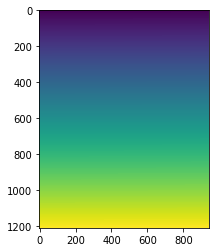

pixel_id.1


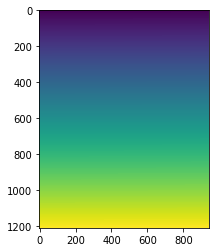

Road_Dist


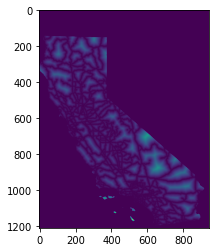

Elec_Dist


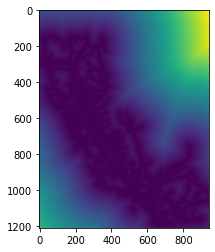

Cultivated_Prop


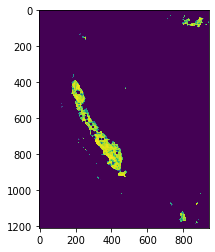

Elev


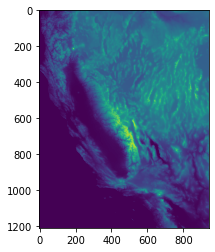

aet__count_above_mean_Normal


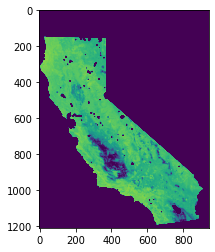

aet__count_below_mean_Normal


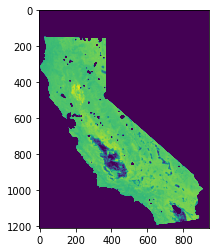

aet__first_location_of_maximum_Normal


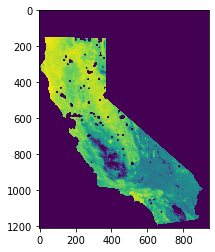

aet__last_location_of_maximum_Normal


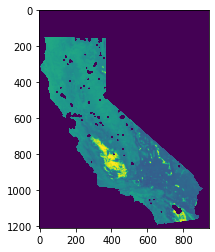

aet__longest_strike_above_mean_Normal


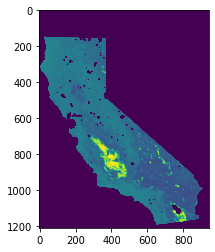

aet__longest_strike_below_mean_Normal


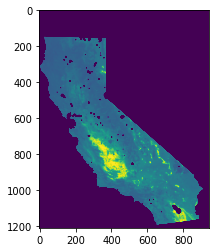

aet__maximum_Normal


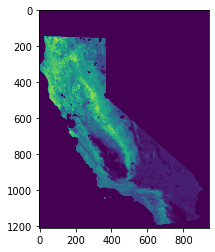

aet__mean_Normal


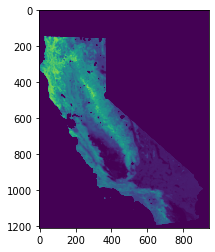

aet__minimum_Normal


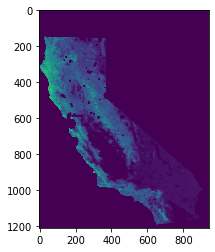

aet__quantile__q_0.1_Normal


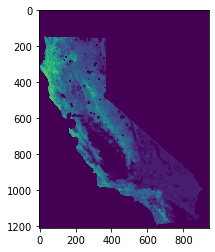

aet__quantile__q_0.5_Normal


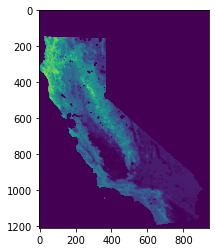

aet__quantile__q_0.9_Normal


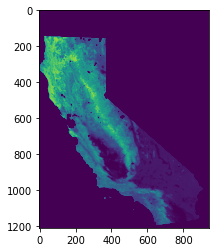

aet__skewness_Normal


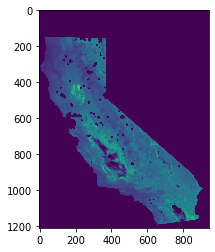

aet__standard_deviation_Normal


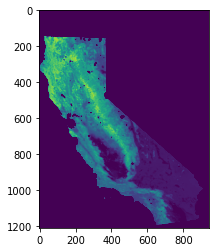

cwd__count_above_mean_Normal


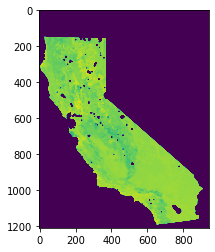

cwd__count_below_mean_Normal


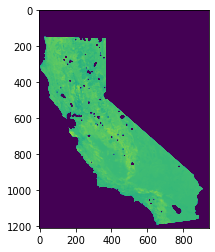

cwd__first_location_of_maximum_Normal


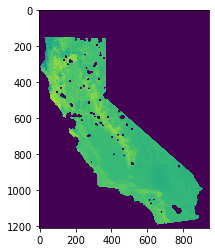

cwd__last_location_of_maximum_Normal


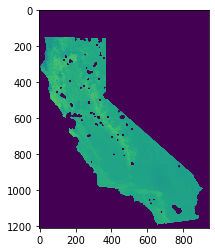

cwd__longest_strike_above_mean_Normal


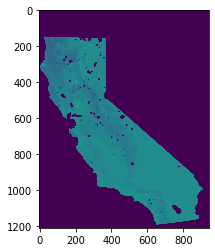

cwd__longest_strike_below_mean_Normal


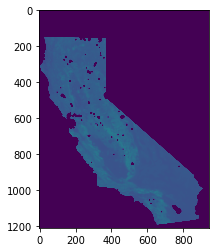

cwd__maximum_Normal


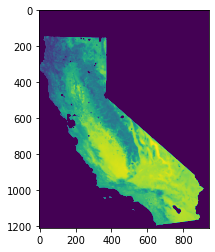

cwd__mean_Normal


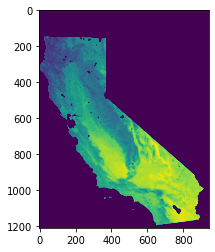

cwd__minimum_Normal


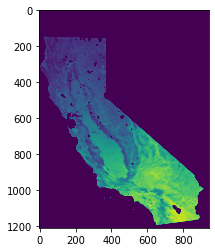

cwd__quantile__q_0.1_Normal


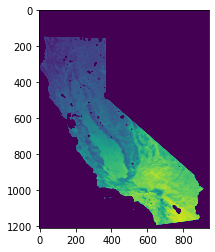

cwd__quantile__q_0.5_Normal


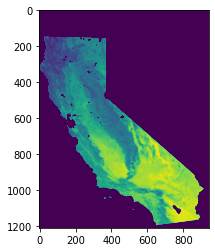

cwd__quantile__q_0.9_Normal


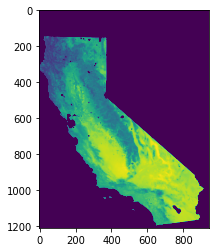

cwd__skewness_Normal


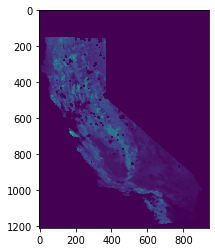

cwd__standard_deviation_Normal


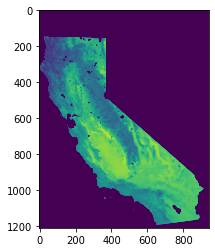

pck__count_above_mean_Normal


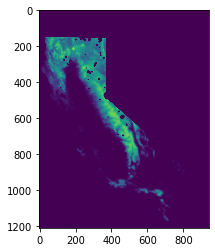

pck__count_below_mean_Normal


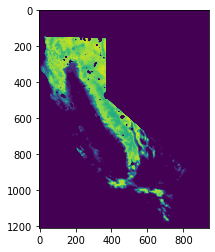

pck__first_location_of_maximum_Normal


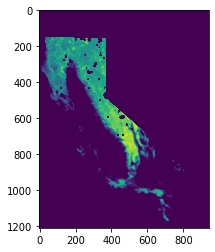

pck__last_location_of_maximum_Normal


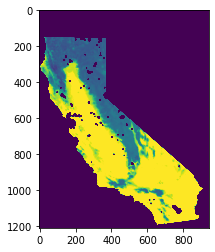

pck__longest_strike_above_mean_Normal


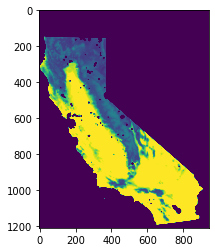

pck__longest_strike_below_mean_Normal


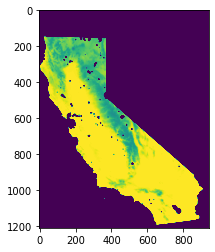

pck__maximum_Normal


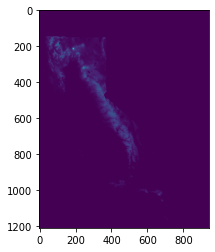

pck__mean_Normal


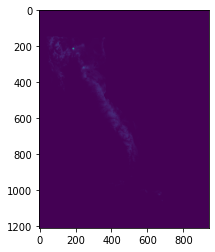

pck__minimum_Normal


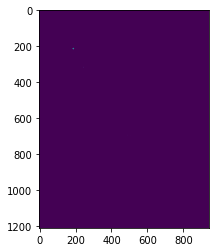

pck__quantile__q_0.1_Normal


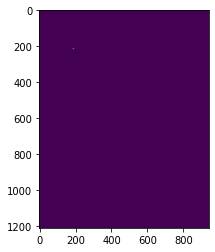

pck__quantile__q_0.5_Normal


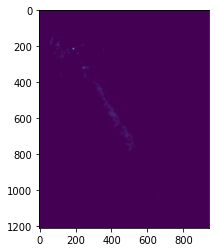

pck__quantile__q_0.9_Normal


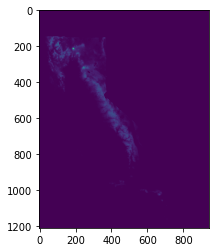

pck__skewness_Normal


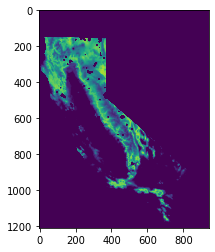

pck__standard_deviation_Normal


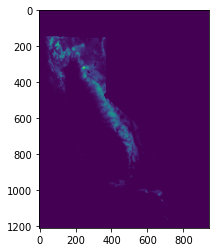

aet__mean_ThreeYear_Dev


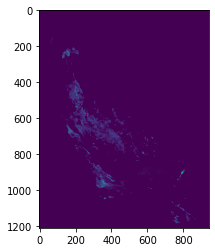

cwd__mean_ThreeYear_Dev


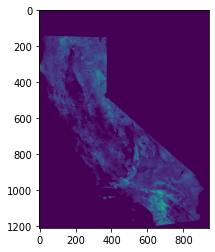

Mean_Housing_Dens_25km


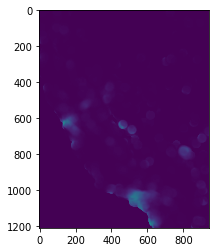

FFWI


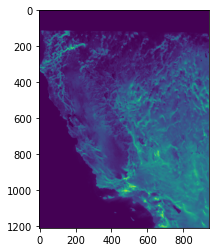

FFWI_UCLA


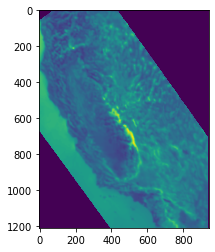

time_since_fire


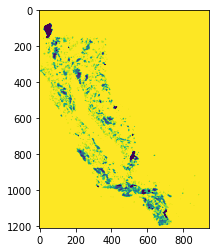

In [49]:
df = load_data(years=[2003], data_files=data_files)
replace_invalid_value(df)
IGNORE_COLUMNS = {'time_Normal', 'time', 'value'}

for feature in features:
    if feature in IGNORE_COLUMNS:
        continue
    
    print(feature)
    df_feature = df[feature]
    df_feature = np.array(list(df_feature)).reshape(1209, 941)
    plt.imshow(df_feature, vmin=0, vmax=np.nanmax(df_feature))
    plt.show()
